# Machine Learning Project - Churn Modelling

## Business Objective
Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on the revenues. Companies often seek to know which customers are likely to churn in the recent future so that a timely action could be taken to prevent it.

## Problem Statement
You have been assigned the task to build for this Telecom company a Logistic Regression Machine Learning model that predicts which of their customers are likely to churn (stop using their service in future). For more details on the intermediate and final outputs expected, refer to the list of deliverables mentioned in the “Model Building” and “Model Validation” sections below.

# Data Description
 Churn: 1 if customer cancelled service, 0 if not (Target)
 
 AccountWeeks: number of weeks customer has had active account
 
 ContractRenewal: 1 if customer recently renewed contract, 0 if not
 
 DataPlan: 1 if customer has data plan, 0 if not
 
 DataUsage: gigabytes of monthly data usage
 
 CustServCalls: number of calls into customer service
 
 DayMins: average daytime minutes per month
 
 DayCalls: average number of daytime calls
 
 MonthlyCharge: average monthly bill
 
 OverageFee: largest overage fee in last 12 months
 
 RoamMins: average number of roaming minutes

## Step 1: Data Exploration and Visualization
### First, we will explore the dataset to understand the features and their relationships with the target variable, Churn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
file_loc = r'C:\Users\pc\Desktop\churn project\Churn Modeling\Dataset.csv'
df = pd.read_csv(file_loc)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [2]:
print(df.dtypes)

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object


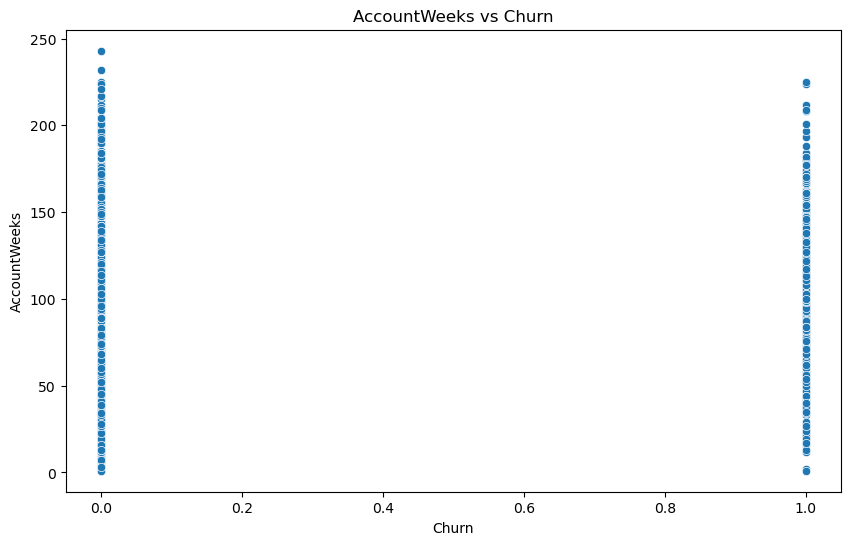

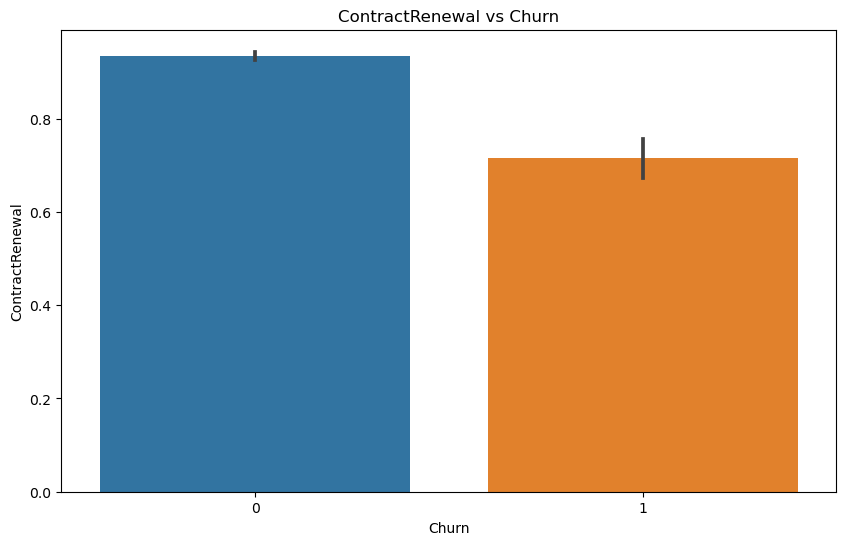

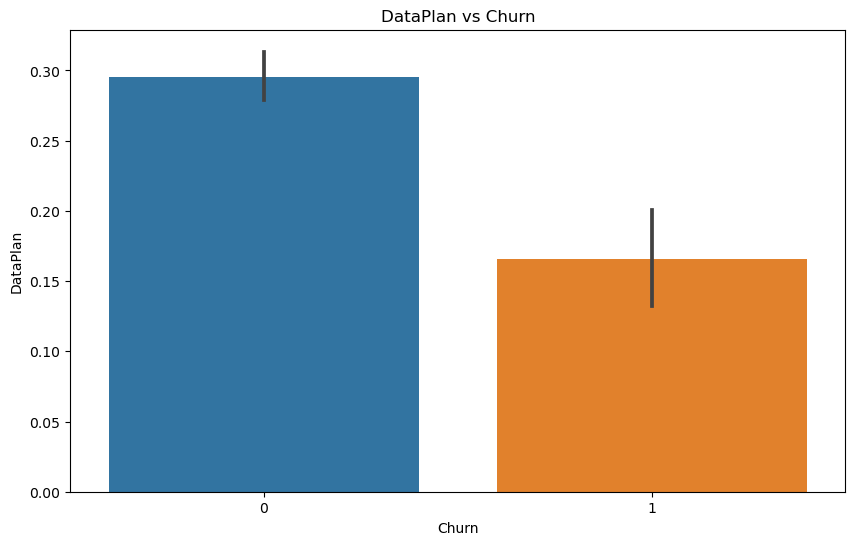

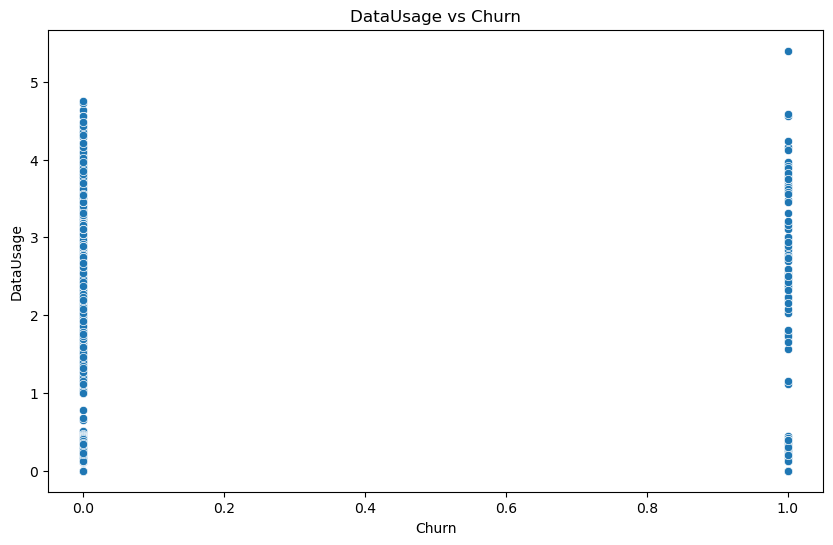

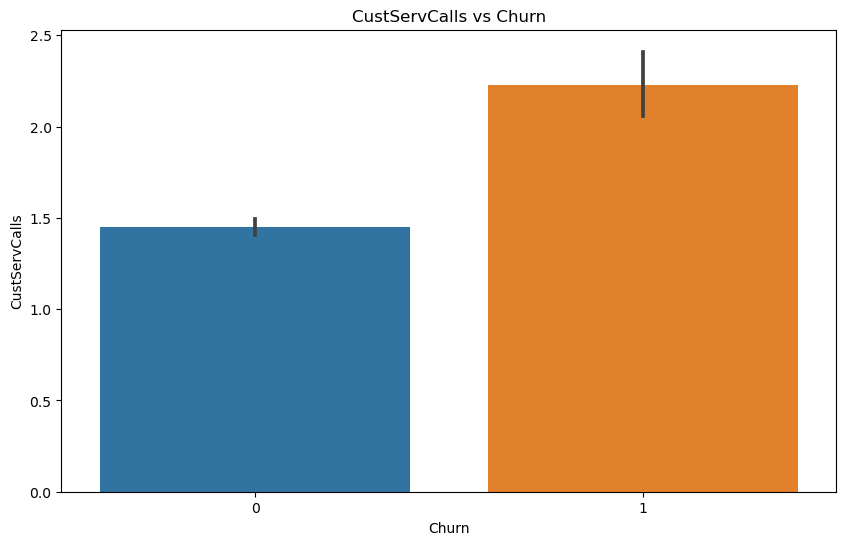

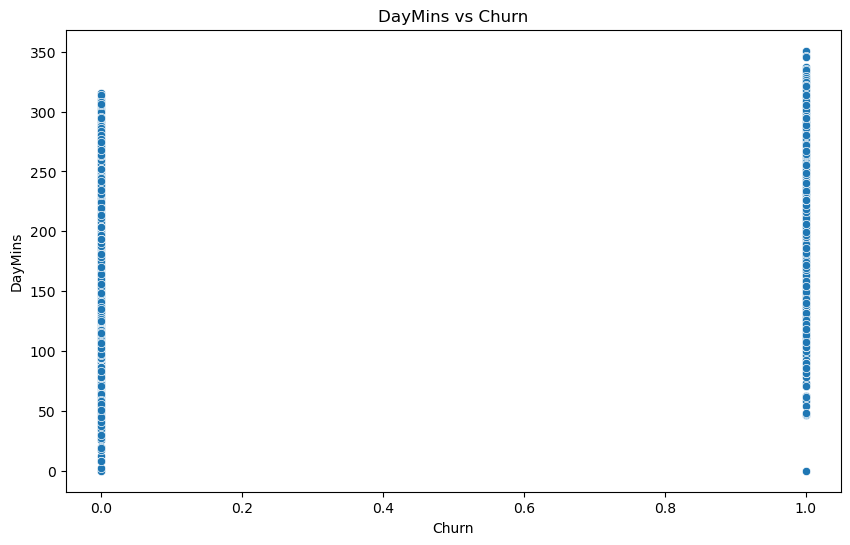

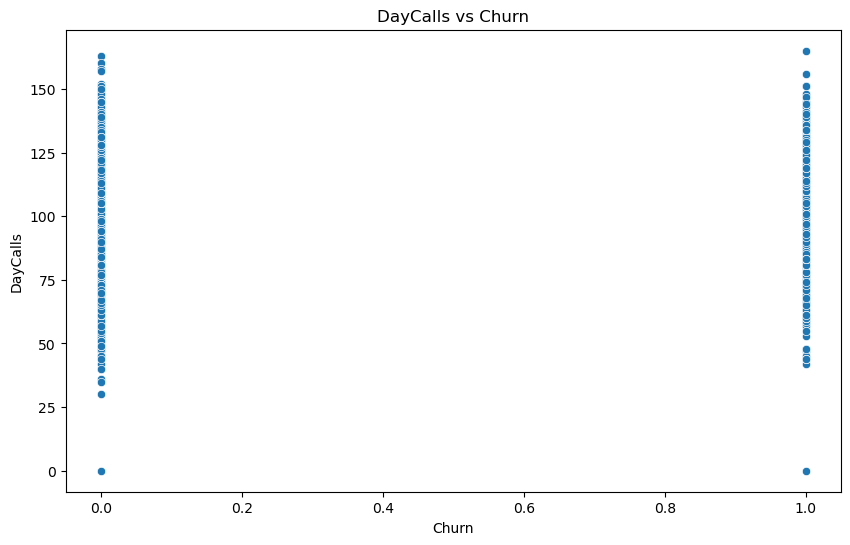

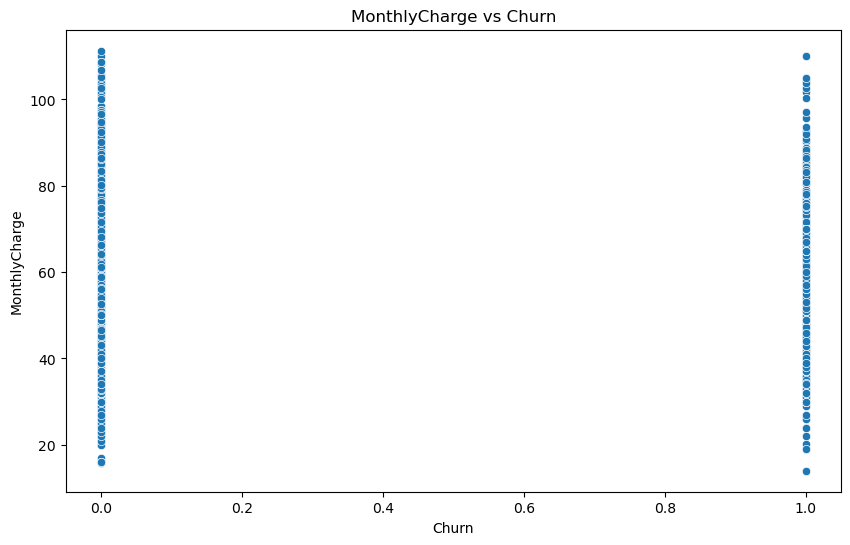

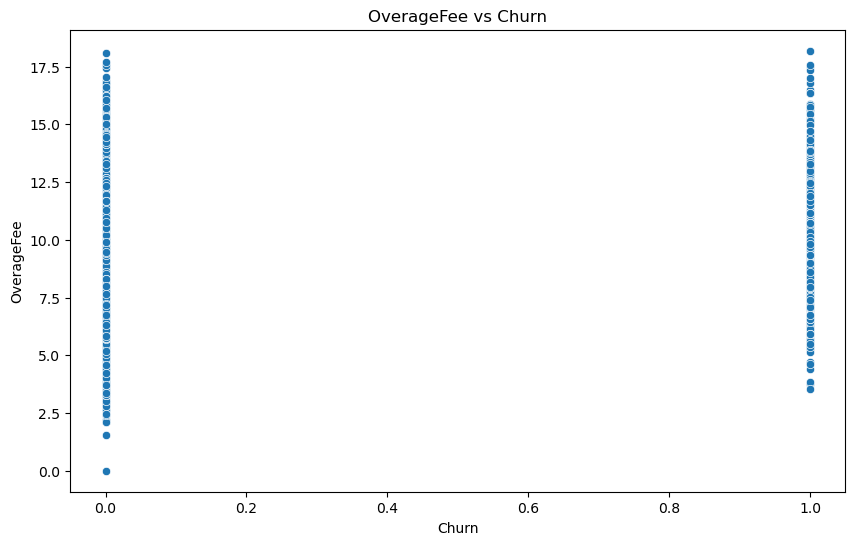

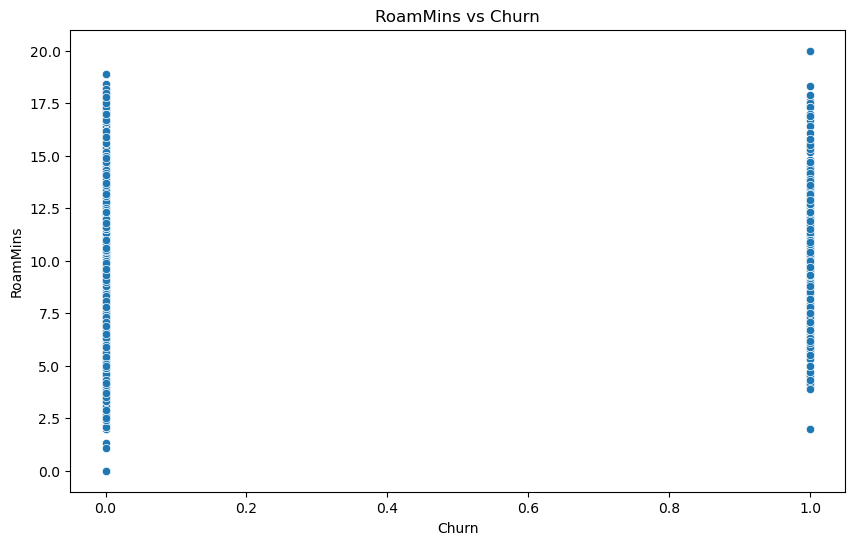

In [3]:
# Bivariate plots
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 
            'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

for feature in features:
    plt.figure(figsize=(10, 6))
    if df[feature].nunique() <= 10:  # for categorical features
        sns.barplot(x='Churn', y=feature, data=df)
    else:  # for continuous features
        sns.scatterplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

# Step 2: Data Preprocessing

In [4]:
# Check for missing values
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Feature Engineering:

Create dummy variables for categorical features.

Scale continuous variables if necessary.

In [5]:
# Dummy variables for categorical features
df = pd.get_dummies(df, columns=['ContractRenewal', 'DataPlan'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']] = scaler.fit_transform(df[['AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']])


In [6]:
df

,Churn,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal_1,DataPlan_1
0,0,0.676489,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,True,True
1,0,0.149065,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,True,True
2,0,0.902529,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,True,False
3,0,-0.428590,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,False,False
4,0,-0.654629,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,2.283878,1.456628,0.332354,-0.432895,-1.167924,0.937363,0.287344,-0.120832,True,True
3329,0,-0.830437,-0.374447,1.092641,0.942447,-2.164631,0.005775,-0.939320,-0.228304,True,False
3330,0,-1.835055,-0.641642,0.332354,0.018820,0.426808,-0.018581,1.730942,1.383778,True,False
3331,0,2.082955,-0.641642,0.332354,0.624778,0.227466,-0.383909,-0.817048,-1.876211,False,False


# Step 3: Model Building
Split the Data:

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Train Logistic Regression Model:

In [8]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
print(logit_model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).